In [17]:
from __future__ import print_function
import numpy as np

LIM = 10 ** 6
N = 10 ** 9
P = 10001
primes = [2]
p = 2

# By listing the first six prime numbers: 2, 3, 5, 7, 11, and 13, we can see that the 6th prime is 13.
# What is the 10,001st prime number?

def sieve_primes(a, p):
    # Sieve out multiples of p
    a = a[a % p != 0]
    return a

for i in range(3, N, LIM):
    # Create a list of consecutive integers
    a = np.arange(i, i + LIM, 2)

    while len(primes) < P and len(a) > 0:
        a = sieve_primes(a, p)
        primes.append(p)

        if len(a) > 0:
            p = a[0]

print(len(primes), primes[P-1])



10001 104729


In [19]:
from __future__ import print_function
import numpy as np

#The prime factors of 13195 are 5, 7, 13 and 29.

#What is the largest prime factor of the number 600851475143 ?


N = 600851475143
LIM = 10 ** 6

def factor(n):
   #1. Create array of trial values
   a = np.ceil(np.sqrt(n))
   lim = min(n, LIM)
   a = np.arange(a, a + lim)
   b2 = a ** 2 - n

   #2. Check whether b is a square
   fractions = np.modf(np.sqrt(b2))[0]

   #3. Find 0 fractions
   indices = np.where(fractions == 0)

   #4. Find the first occurrence of a 0 fraction
   a = np.ravel(np.take(a, indices))[0]
   # Or a = a[indices][0]

   a = int(a)
   b = np.sqrt(a ** 2 - n) 
   b = int(b)
   c = a + b
   d = a - b

   if c == 1 or d == 1:
      return

   print(c, d)
   factor(c)
   factor(d)

factor(N)
#1234169 486847
#1471 839
#6857 71


1234169 486847
1471 839
6857 71


In [9]:
import numpy as np

#A palindromic number reads the same both ways. 
#The largest palindrome made from the product of two 2-digit numbers is 9009 = 91 x 99.

#Find the largest palindrome made from the product of two 3-digit numbers.


#1. Create  3-digits numbers array
a = np.arange(100, 1000)
np.testing.assert_equal(100, a[0])
np.testing.assert_equal(999, a[-1])

#2. Create products array
numbers = np.outer(a, a)
numbers = np.ravel(numbers)
numbers.sort()
np.testing.assert_equal(810000, len(numbers))
np.testing.assert_equal(10000, numbers[0])
np.testing.assert_equal(998001, numbers[-1])

#3. Find largest palindromic number
for number in numbers[::-1]:
   s = str(number)

   if s == s[::-1]:
      print(s)
      break


906609


[*********************100%%**********************]  1 of 1 completed

[181.99000549 182.91000366 177.55999756 185.63999939 171.36999512]
[188.63000488 175.03999329 183.38000488 207.1499939  213.07000732]
5 5
67.80000305175781


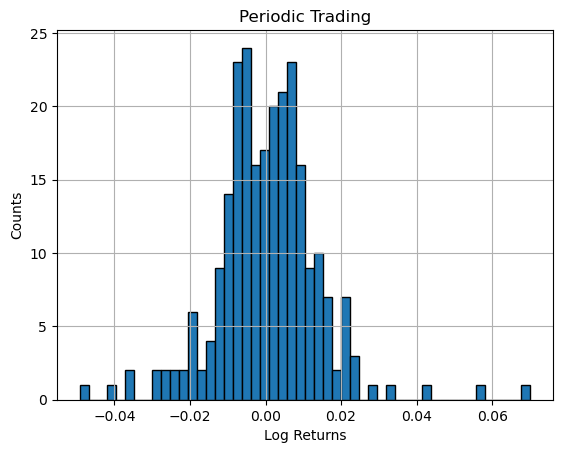

In [21]:
from __future__ import print_function
import yfinance as yf
from datetime import date, timedelta
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# 1. Get close prices.
today = date.today()
start = today - timedelta(days=365)

# Fetch data from Yahoo Finance using yfinance
data = yf.download('AAPL', start=start, end=today)
close = data['Close'].values

# 2. Get log returns.
logreturns = np.diff(np.log(close))

# 3. Calculate breakout and pullback
freq = 0.02
breakout = scipy.stats.scoreatpercentile(logreturns, 100 * (1 - freq))
pullback = scipy.stats.scoreatpercentile(logreturns, 100 * freq)

# 4. Generate buys and sells
buys = np.compress(logreturns < pullback, close[1:])
sells = np.compress(logreturns > breakout, close[1:])
print(buys)
print(sells)
print(len(buys), len(sells))
print(sells.sum() - buys.sum())

# 5. Plot a histogram of the log returns
plt.title('Periodic Trading')
plt.hist(logreturns, bins=50, edgecolor='k')
plt.grid()
plt.xlabel('Log Returns')
plt.ylabel('Counts')
plt.show()


[*********************100%%**********************]  1 of 1 completed
/var/folders/dv/3stz4zmn5jn1dhpcpw10k25h0000gp/T/ipykernel_43357/3364200042.py:24: RuntimeWarning: divide by zero encountered in divide
  freqs = 1.0 / counts


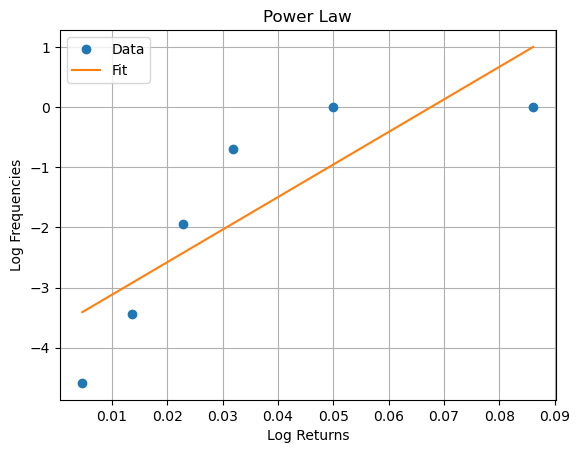

In [23]:
import yfinance as yf
from datetime import date, timedelta
import numpy as np
import matplotlib.pyplot as plt

# 1. Get close prices.
today = date.today()
start = today - timedelta(days=365)

# Fetch data from Yahoo Finance using yfinance
data = yf.download('IBM', start=start, end=today)
close = data['Close'].values

# 2. Get positive log returns.
logreturns = np.diff(np.log(close))
pos = logreturns[logreturns > 0]

# 3. Get frequencies of returns.
counts, rets = np.histogram(pos)
# 0 counts indices
indices0 = np.where(counts != 0)
rets = rets[:-1] + (rets[1] - rets[0]) / 2
# Could generate divide by 0 warning
freqs = 1.0 / counts
freqs = np.take(freqs, indices0)[0]
rets = np.take(rets, indices0)[0]
freqs = np.log(freqs)

# 4. Fit the frequencies and returns to a line.
p = np.polyfit(rets, freqs, 1)

# 5. Plot the results.
plt.title('Power Law')
plt.plot(rets, freqs, 'o', label='Data')
plt.plot(rets, p[0] * rets + p[1], label='Fit')
plt.xlabel('Log Returns')
plt.ylabel('Log Frequencies')
plt.legend()
plt.grid()
plt.show()
